# Importing major Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading train and test data

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Checking for null values

In [5]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [6]:
test.isnull().sum()/len(test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [7]:
# Dropping Cabin column because it has very high null values

train.drop(columns='Cabin',inplace=True)
test.drop(columns='Cabin',inplace=True)

In [8]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# Fill null values in Embarked with the most common value 'S'

train['Embarked'].fillna('S',inplace=True)

In [11]:
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.000000
dtype: float64

In [12]:
test.isnull().sum()/len(test)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Embarked       0.000000
dtype: float64

In [13]:
# Filling null values in fare column with the mode of the column

test['Fare'].fillna(test['Fare'].mode()[0],inplace=True)

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Exploring data with graphs

c:\users\golua\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\golua\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

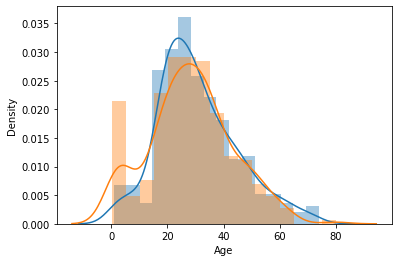

In [15]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

<AxesSubplot:xlabel='Age', ylabel='Count'>

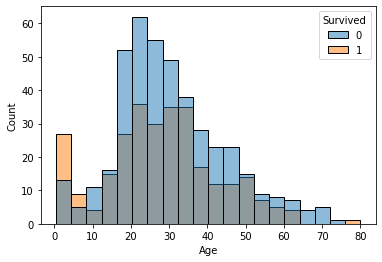

In [16]:
sns.histplot(x=train['Age'],hue=train['Survived'])

# looks like children and senior adults survived the most

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

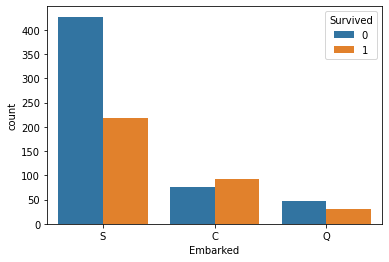

In [17]:
sns.countplot(data=train,x='Embarked',hue='Survived')
train.groupby('Embarked').mean()['Survived']

# people who embarked from C survived the most

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

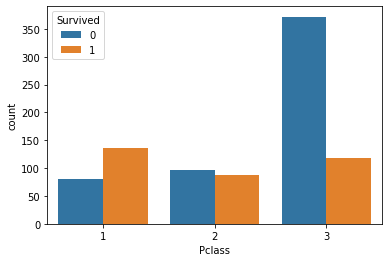

In [18]:
sns.countplot(data=train,x='Pclass',hue='Survived')
train.groupby('Pclass').mean()['Survived']

# people travelling in 1st class survived the most followed by 2nd class then 3rd class

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

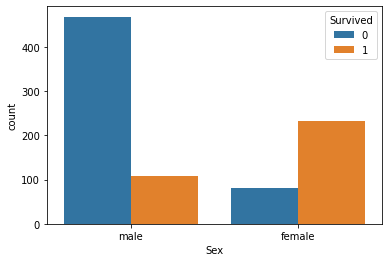

In [19]:
sns.countplot(data=train,x='Sex',hue='Survived')
train.groupby('Sex').mean()['Survived']

# females survived the most

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


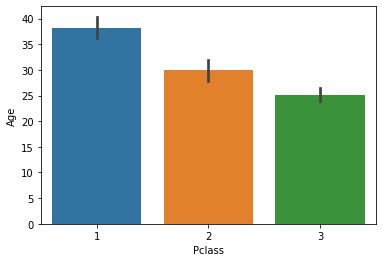

In [20]:
sns.barplot(data=train,x='Pclass',y='Age')
train.groupby('Pclass').mean()

<AxesSubplot:xlabel='Survived', ylabel='Age'>

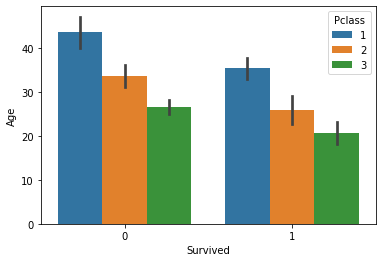

In [21]:
sns.barplot(data=train,x='Survived',y='Age',hue='Pclass')

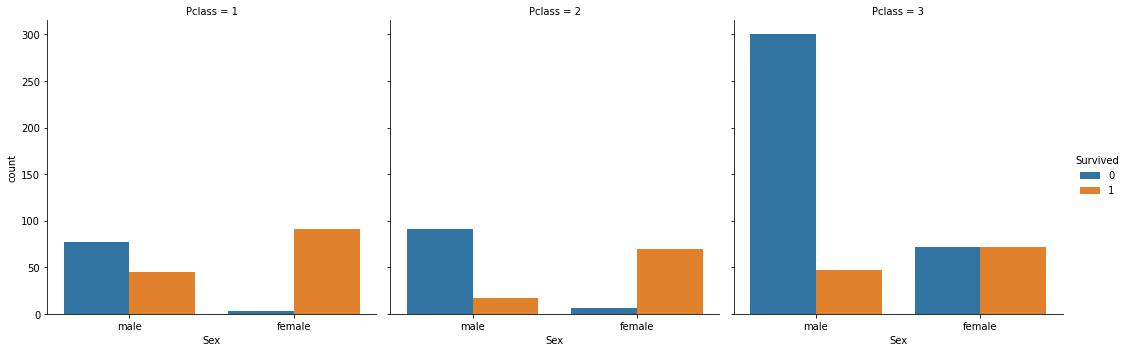

In [22]:
sns.catplot(data=train,x='Sex',col='Pclass',hue='Survived',kind='count')

In [23]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.857145
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Grouping together 'parch' and 'sibsp' into 1 column 'family'

In [24]:
train['family']=train['Parch']+train['SibSp']+1
test['family']=test['Parch']+test['SibSp']+1

In [25]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [26]:
test['family'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: family, dtype: int64

# Dividing the family size as 'single' , 'medium' and 'large'

In [27]:
def family(x):
    if x==1:
        return 'Single'
    elif (x>1 and x<5):
        return 'Medium'
    else:
        return 'Large'

In [28]:
train['family'] = train['family'].apply(family)
test['family'] = test['family'].apply(family)

In [29]:
train['family'].value_counts()

Single    537
Medium    292
Large      62
Name: family, dtype: int64

In [30]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
family           0
dtype: int64

In [31]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
family          0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

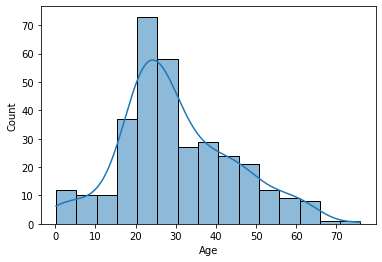

In [32]:
sns.histplot(test['Age'],kde=True)

# Age has almost normal distribution

# Generate random age for people with missing age values
### Random age is guessed within 1 SD from the mean

In [33]:
random_age_train = np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)
random_age_test = np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [34]:
train.Age[train['Age'].isnull()]=random_age_train
test.Age[test['Age'].isnull()]=random_age_test

C:\Users\golua\AppData\Local\Temp/ipykernel_10956/87093788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Age[train['Age'].isnull()]=random_age_train
C:\Users\golua\AppData\Local\Temp/ipykernel_10956/87093788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Age[test['Age'].isnull()]=random_age_test


In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Single


In [36]:
passenger_id_train=train['PassengerId']
passenger_id_test=test['PassengerId']

# Dropping irrelevant columns

In [37]:
train.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket'],inplace=True)
test.drop(columns=['PassengerId','Name','SibSp','Parch','Ticket'],inplace=True)

# Creating dummy variables for categorical data

In [38]:
train = pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family'],drop_first=True)
test = pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family'],drop_first=True)

In [39]:
train.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Medium,family_Single
0,0,22.0,7.2500,0,1,1,0,1,1,0
1,1,38.0,71.2833,0,0,0,0,0,1,0
2,1,26.0,7.9250,0,1,0,0,1,0,1
3,1,35.0,53.1000,0,0,0,0,1,1,0
4,0,35.0,8.0500,0,1,1,0,1,0,1


In [40]:
test.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Medium,family_Single
0,34.5,7.8292,0,1,1,1,0,0,1
1,47.0,7.0000,0,1,0,0,1,1,0
2,62.0,9.6875,1,0,1,1,0,0,1
3,27.0,8.6625,0,1,1,0,1,0,1
4,22.0,12.2875,0,1,0,0,1,1,0


# Dividing the data into X and y

In [41]:
X=train.drop(columns=['Survived'])
y=train['Survived']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)

# Model Building

In [43]:
from sklearn.tree import DecisionTreeClassifier
clfdt=DecisionTreeClassifier(max_depth=2)

In [44]:
clfdt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [45]:
y_pred = clfdt.predict(X_test)

# The accuracy of our model is ~ 80%

In [46]:
clfdt.score(X_test,y_test)

0.7985074626865671

# Tuning max_depth for DecisionTree using GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param={'max_depth':[2,3,4,5,6,7]}

In [49]:
clfdtgs= GridSearchCV(DecisionTreeClassifier(),param,cv=5)

In [50]:
clfdtgs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7]})

In [64]:
cv_df = pd.DataFrame(clfdtgs.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003399,4.905052e-04,0.002598,4.908364e-04,2,{'max_depth': 2},0.776,0.800,0.768,0.725806,0.758065,0.765574,0.024239,6
1,0.003797,3.994487e-04,0.002199,3.999002e-04,3,{'max_depth': 3},0.808,0.840,0.792,0.782258,0.822581,0.808968,0.020739,3
2,0.003598,4.898043e-04,0.001998,3.989506e-07,4,{'max_depth': 4},0.784,0.864,0.784,0.733871,0.830645,0.799303,0.044537,4
3,0.003598,4.903688e-04,0.002398,4.900574e-04,5,{'max_depth': 5},0.824,0.848,0.800,0.758065,0.838710,0.813755,0.032221,1
4,0.003798,7.473471e-04,0.002199,3.995898e-04,6,{'max_depth': 6},0.816,0.856,0.808,0.774194,0.806452,0.812129,0.026184,2
5,0.003997,9.172146e-07,0.002199,4.000674e-04,7,{'max_depth': 7},0.760,0.800,0.808,0.766129,0.741935,0.775213,0.024943,5


In [52]:
clfdtgs.best_params_

{'max_depth': 5}

# The accuracy of our model is ~ 82%

In [53]:
clfdtgs.score(X_test,y_test)

0.8134328358208955

# Trying Random Forest classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc=RandomForestClassifier()

In [56]:
param={'max_depth':[2,3,4,5,6,7],'n_estimators':[10,20,30,40,50,60,70,80,90,100]}

In [57]:
clfrfgs= GridSearchCV(rfc,param,cv=5)

In [58]:
clfrfgs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [59]:
clfrfgs.best_params_

{'max_depth': 6, 'n_estimators': 70}

# The accuracy of our model is unchanged at ~ 82%

In [60]:
clfrfgs.score(X_test,y_test)

0.8208955223880597

# Predicting survival for passengers in test data

In [61]:
y_pred = clfrfgs.predict(test)

In [62]:
test['Survived'] = y_pred

In [63]:
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Medium,family_Single,Survived
0,34.5,7.8292,0,1,1,1,0,0,1,0
1,47.0,7.0000,0,1,0,0,1,1,0,0
2,62.0,9.6875,1,0,1,1,0,0,1,0
3,27.0,8.6625,0,1,1,0,1,0,1,0
4,22.0,12.2875,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,35.0,8.0500,0,1,1,0,1,0,1,0
414,39.0,108.9000,0,0,0,0,0,0,1,1
415,38.5,7.2500,0,1,1,0,1,0,1,0
416,34.0,8.0500,0,1,1,0,1,0,1,0
